# Data Screening

Steve Purves [](https://orcid.org/0000-0002-0760-5497)

Load and review the data, check that dates are loaded properly and filter data down to the events in La Palma only. The dataset itself contains all recent IGN earthquake data for Spanish territory.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/catalogoComunSV_1663233588717.csv', sep=';')
df.columns = ['Event', 'Date', 'Time', 'Latitude', 'Longitude', 'Depth(km)', 'Intensity','Magnitude', 'Type Mag', 'Location']
df['Time'] = df['Time'].str.strip()
df['Date'] = df['Date'].str.strip()
df['DateTime'] = (df['Date'] + ' ' + df['Time']).apply(pd.to_datetime, format='%d/%m/%Y %H:%M:%S')
df['Timestamp'] = pd.to_numeric(pd.to_datetime(df['DateTime']))
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df = df.sort_values(by=['DateTime'], ascending=True)
df.head()

In [4]:
df.describe()

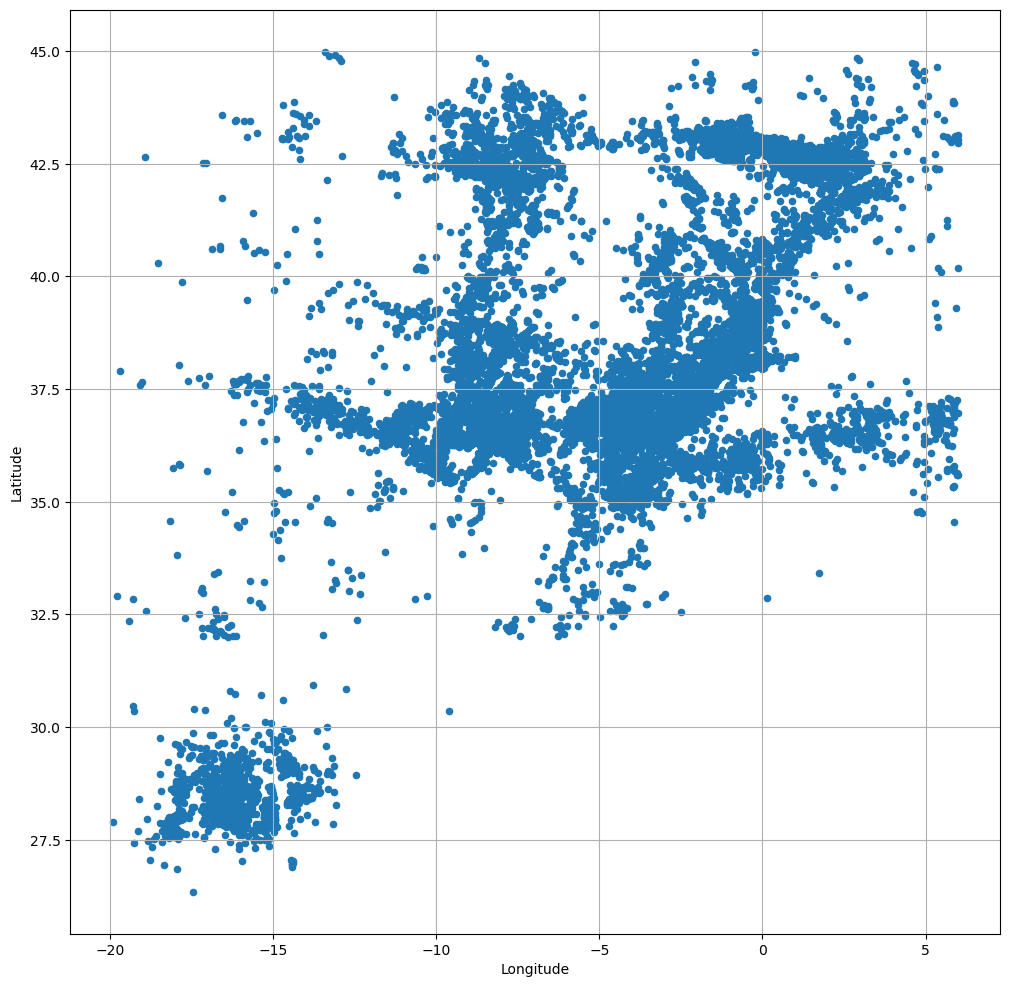

In [5]:
df.plot.scatter(x="Longitude", y="Latitude", figsize=(12,12), grid="on");

### Filter down to La Palma events only

Also some rows seem to be missing depth measurements, (see differences in the **count** for columns above) - take only rows with valid depths

In [6]:
df = df[(df['Latitude'] < 28.7) & (df['Latitude'] > 28.3) & (df['Longitude'] < -17.7) & (df['Longitude'] > -18)]
df = df[df['Depth(km)'].notna()]
df.describe()

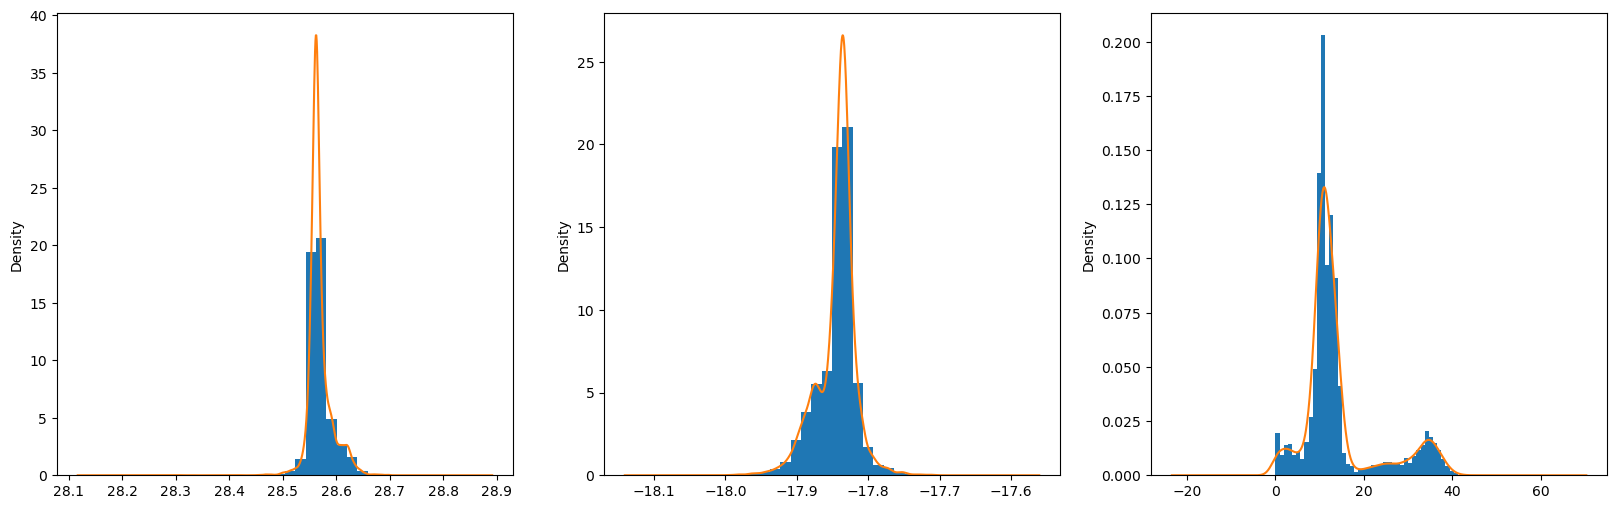

In [7]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
df["Latitude"].plot.hist(bins=20, density=True)
df["Latitude"].plot.kde()
plt.subplot(1,3,2)
df["Longitude"].plot.hist(bins=20, density=True)
df["Longitude"].plot.kde()
plt.subplot(1,3,3)
df["Depth(km)"].plot.hist(bins=50, density=True)
_=df["Depth(km)"].plot.kde()

## Spatial Plot

Scatter plot the spatial locations of events

In [14]:
from matplotlib import colormaps
cmap = colormaps['viridis_r']
ax = df.plot.scatter(x="Longitude", y="Latitude", 
                     s=40-df["Depth(km)"], c=df["Magnitude"], 
                     figsize=(12,10), grid="on", cmap=cmap)
colorbar = ax.collections[0].colorbar
colorbar.set_label("Magnitude")

plt.show()

### Timeline Plot

Scatter plot the event time series and look for any quantization issues. Have times & dates been loaded correctly?

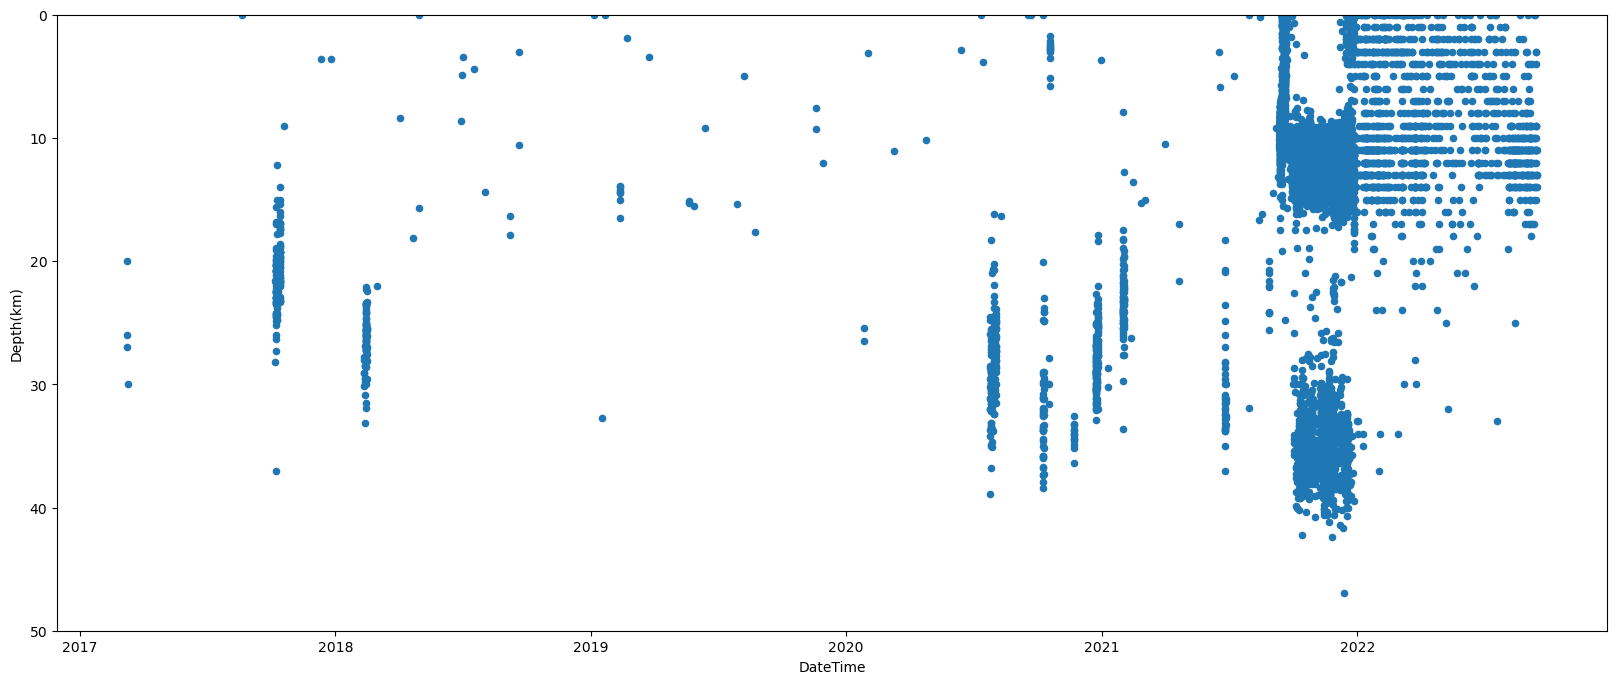

In [10]:
ax = df.plot.scatter(x='DateTime', y='Depth(km)', figsize=(20,8))
ax.set_ylim(50,0);

In [11]:
df['Swarm'] = 0
df.loc[(df['Date'] >= '2017-10-01') & (df['Date'] <= '2017-10-31'), 'Swarm'] = 1
df.loc[(df['Date'] >= '2019-02-01') & (df['Date'] <= '2019-02-28'), 'Swarm'] = 2
df.loc[(df['Date'] >= '2020-07-21') & (df['Date'] <= '2020-08-05'), 'Swarm'] = 3
df.loc[(df['Date'] >= '2020-10-04') & (df['Date'] <= '2020-10-10'), 'Swarm'] = 4
df.loc[(df['Date'] >= '2020-10-11') & (df['Date'] <= '2020-10-22'), 'Swarm'] = 5
df.loc[(df['Date'] >= '2020-11-15') & (df['Date'] <= '2020-11-29'), 'Swarm'] = 6
df.loc[(df['Date'] >= '2020-12-10') & (df['Date'] <= '2020-12-29'), 'Swarm'] = 7
df.loc[(df['Date'] >= '2020-12-10') & (df['Date'] <= '2020-12-31'), 'Swarm'] = 8
df.loc[(df['Date'] >= '2021-01-15') & (df['Date'] <= '2021-02-07'), 'Swarm'] = 9
df.loc[(df['Date'] >= '2021-06-01') & (df['Date'] <= '2021-06-30'), 'Swarm'] = 10
df.loc[(df['Date'] >= '2021-07-01'), 'Swarm'] = None


df['Phase'] = 0;
df.loc[(df['Date'] >= '2021-09-11') & (df['Date'] <= '2021-09-30'), 'Phase'] = 1
df.loc[(df['Date'] >= '2021-10-01') & (df['Date'] <= '2021-11-30'), 'Phase'] = 2
df.loc[(df['Date'] >= '2021-12-01') & (df['Date'] <= '2021-12-31'), 'Phase'] = 3
df.loc[(df['Date'] >= '2021-12-31'), 'Phase'] = 4

In [11]:
df.to_csv("../data/lapalma_ign.csv", index=False)